# **Exploratory Data Analysis(EDA) on Retail Dataset**

Exploratory Data Analysis (EDA) is a critical step in data analysis that helps understand, clean, analyze, and visualize the dataset.

**1. Load and check the dataset:**

In [ ]:
import pandas as pd

In [ ]:
data= '/content/retail_sales_dataset.csv'
df= pd.read_csv(data)

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
#information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
#numerical columns
numerical_columns= df.select_dtypes(exclude= ['object']).columns
print("Numerical columns:")
print(numerical_columns)

#categorical columns
categorical_columns= df.select_dtypes(include= ['object']).columns
print("\nCategorical columns:")
print(categorical_columns)

Numerical columns:
Index(['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount'], dtype='object')

Categorical columns:
Index(['Date', 'Customer ID', 'Gender', 'Product Category'], dtype='object')


**2. Data Cleaning:**

Data cleaning ensures the consistency of dataset after inspection.

In [ ]:
#check datatypes
df.dtypes

,0
Transaction ID,int64
Date,object
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


In [ ]:
#converting date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#checking data types after converting date column to datetime
df.dtypes

,0
Transaction ID,int64
Date,datetime64[ns]
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


In [ ]:
#checking for missing values
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
#checking for duplicate values
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
#checking for unique values
df.nunique()

,0
Transaction ID,1000
Date,345
Customer ID,1000
Gender,2
Age,47
Product Category,3
Quantity,4
Price per Unit,5
Total Amount,18


**3. Univariate Analaysis:**

In this step we'll analyse the individual variables to understand their distribution.

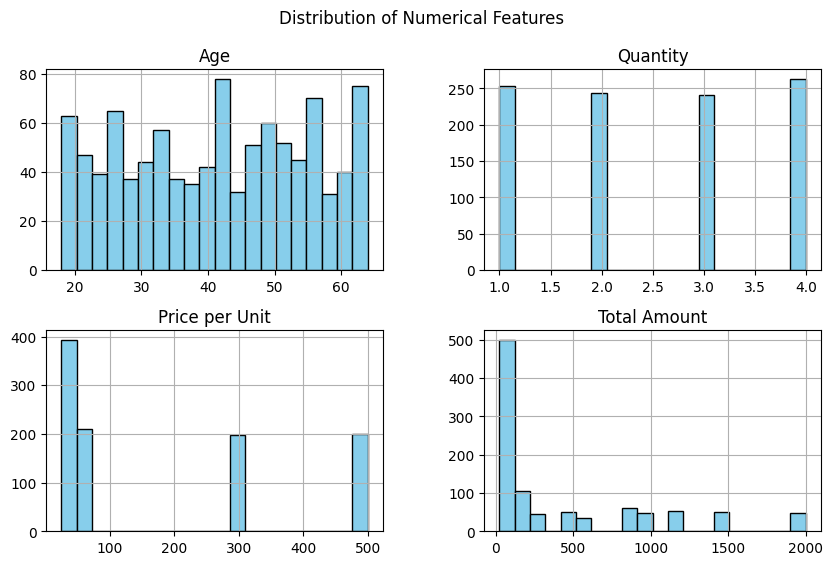

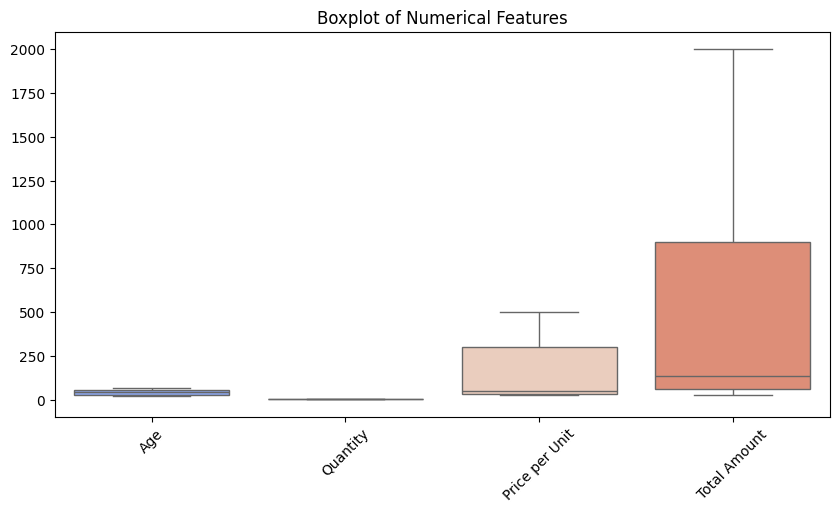

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
num_columns = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

# Plot histogram for each numerical column
df[num_columns].hist(figsize=(10, 6), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

#outlier detection in numerical columns
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[num_columns], palette="coolwarm")
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

**4. Bivariate Analysis:**

Bivariate Analysis helps in understanding relationship between two variables.







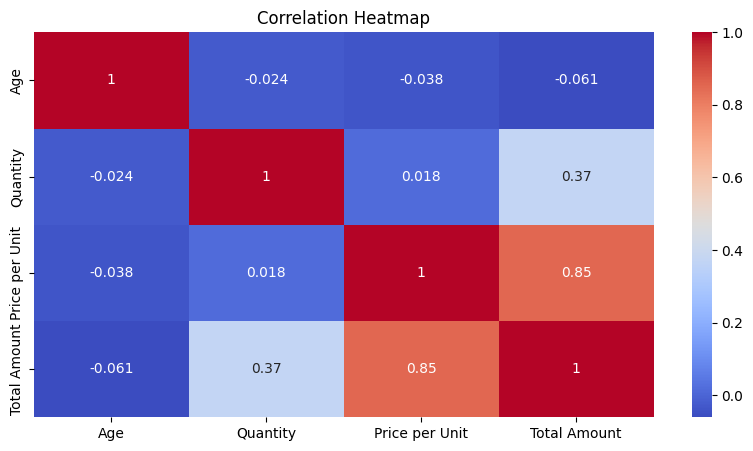

In [ ]:
# Correlation btween numerical variables
plt.figure(figsize=(10, 5))
sns.heatmap(df[num_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

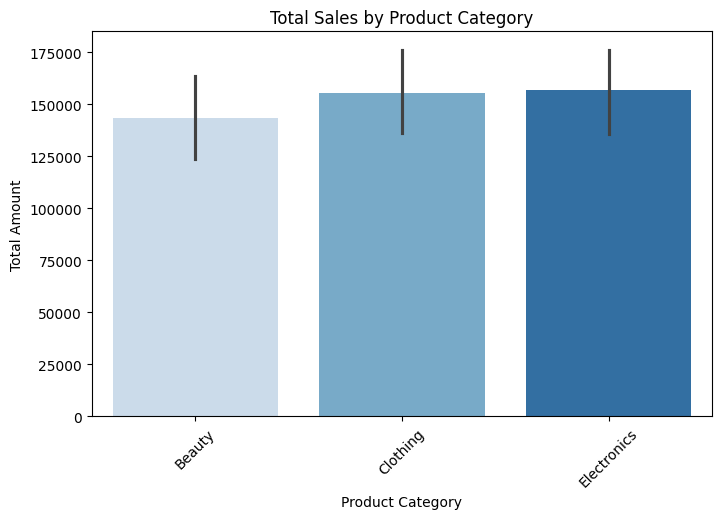

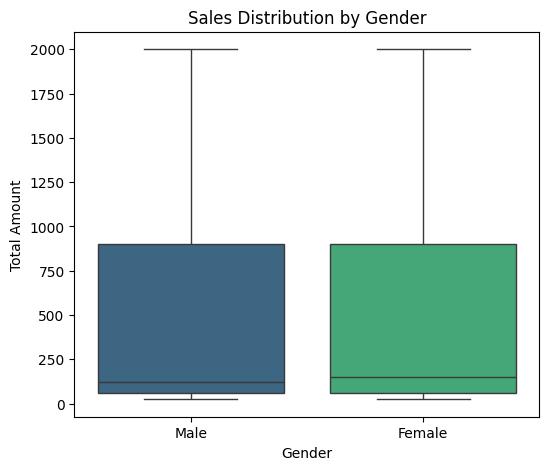

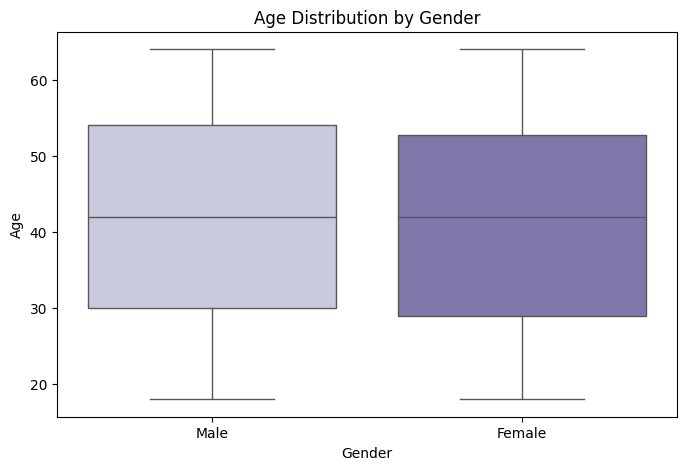

In [ ]:
# correlation between numerical vs categorical

# Bar Plot: Total Sales by Product Category
plt.figure(figsize=(8,5))
sns.barplot(x='Product Category', y='Total Amount',hue= 'Product Category', data=df, estimator=sum, palette= 'Blues')
plt.xticks(rotation=45)
plt.title("Total Sales by Product Category")
plt.show()

# Box Plot: Total Sales by Gender
plt.figure(figsize=(6,5))
sns.boxplot(x='Gender', y='Total Amount', data=df,hue='Gender', palette= 'viridis')
plt.title("Sales Distribution by Gender")
plt.show()

# Box Plot: Total Sales by Age Group
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender', y='Age', data=df, hue='Gender', palette= 'Purples')
plt.title("Age Distribution by Gender")
plt.show()

**5. Descriptive Statistics:**

In [ ]:
#summary of numerical columns
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


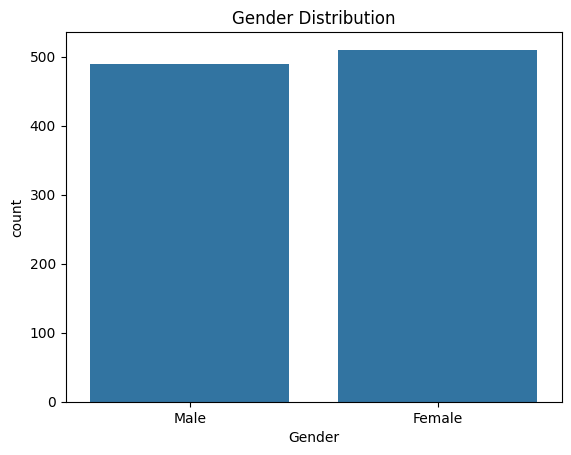

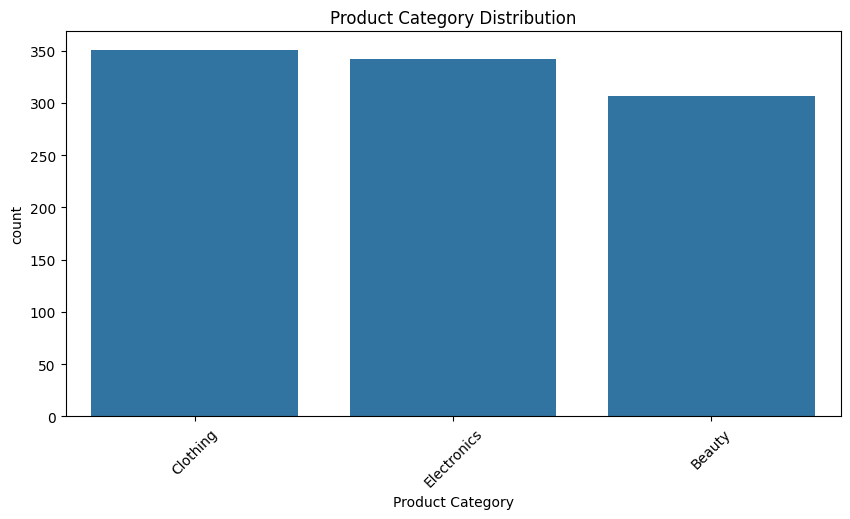

In [ ]:
#gender drictibution
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

#product category distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Product Category', data=df, order=df['Product Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Product Category Distribution")
plt.show()

**6. Time Series Analysis:**

By doing Time Series Analysis on the retaile dataset, we can identify the trends and seasonality in sales.

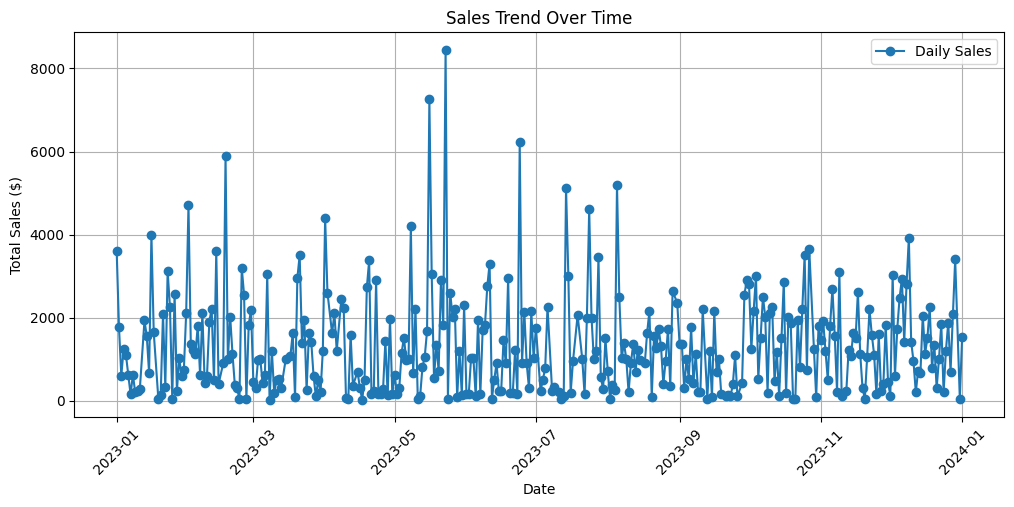

In [ ]:
#Aggregate sales over time
df = df.sort_values(by='Date')

# Aggregate daily sales
daily_sales = df.groupby('Date')['Total Amount'].sum()

# Plot sales trend over time
plt.figure(figsize=(12, 5))
plt.plot(daily_sales, marker='o', linestyle='-', label="Daily Sales")
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

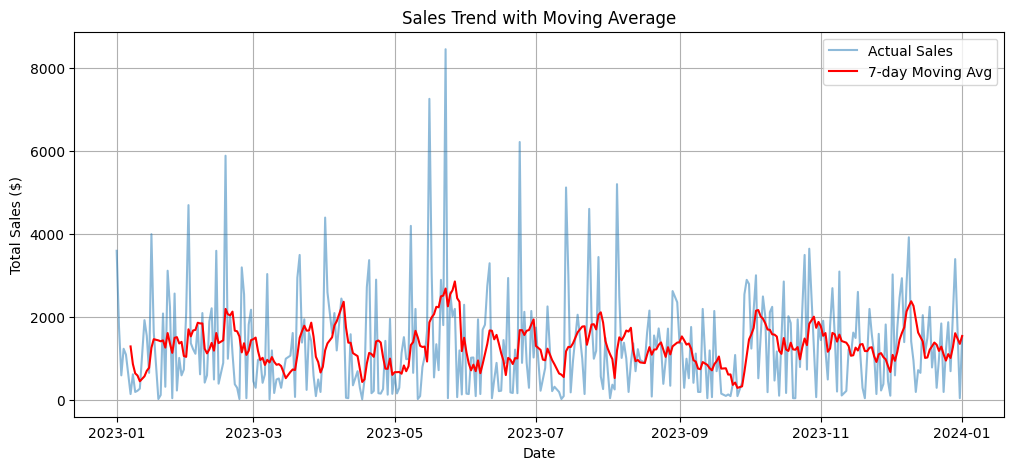

In [ ]:
# Moving Average for Trend Smoothing (7-day moving average)
plt.figure(figsize=(12, 5))
plt.plot(daily_sales, label='Actual Sales', alpha=0.5)
plt.plot(daily_sales.rolling(window=7).mean(), label='7-day Moving Avg', color='red')
plt.title('Sales Trend with Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.legend()
plt.grid(True)
plt.show()

**7. Customer behaviour Analysis:**

These kind of analysis helps in identifying spending patterns and demographics.

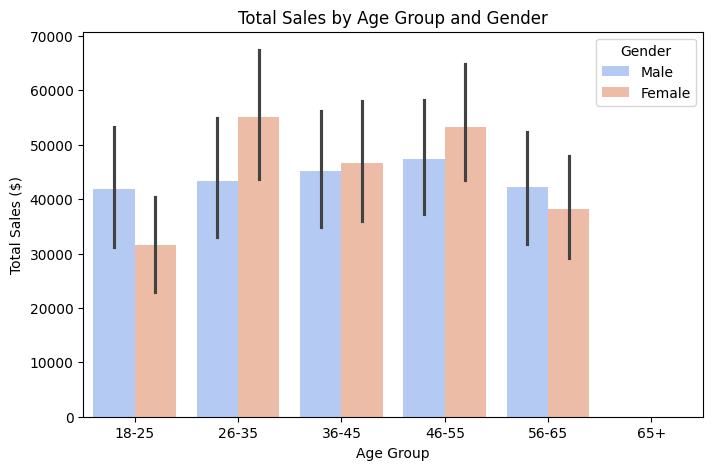

In [ ]:
df['Total Amount'] = df['Total Amount'].astype(float)  # Ensure numeric type

# Sales by Age Group
df['Age Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 100],
                         labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

plt.figure(figsize=(8, 5))
sns.barplot(x='Age Group', y='Total Amount', hue='Gender', data=df, estimator=sum, palette="coolwarm")
plt.title('Total Sales by Age Group and Gender')
plt.xlabel("Age Group")
plt.ylabel("Total Sales ($)")
plt.legend(title="Gender")
plt.show()

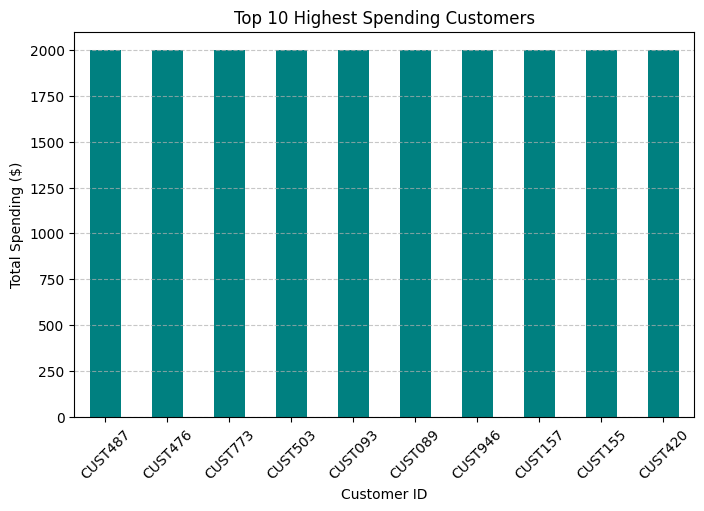

In [ ]:
# Top 10 Customers by Total Spending
top_customers = df.groupby("Customer ID")["Total Amount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
top_customers.plot(kind="bar", color="teal")
plt.title("Top 10 Highest Spending Customers")
plt.xlabel("Customer ID")
plt.ylabel("Total Spending ($)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**8. Product and sales performance:**

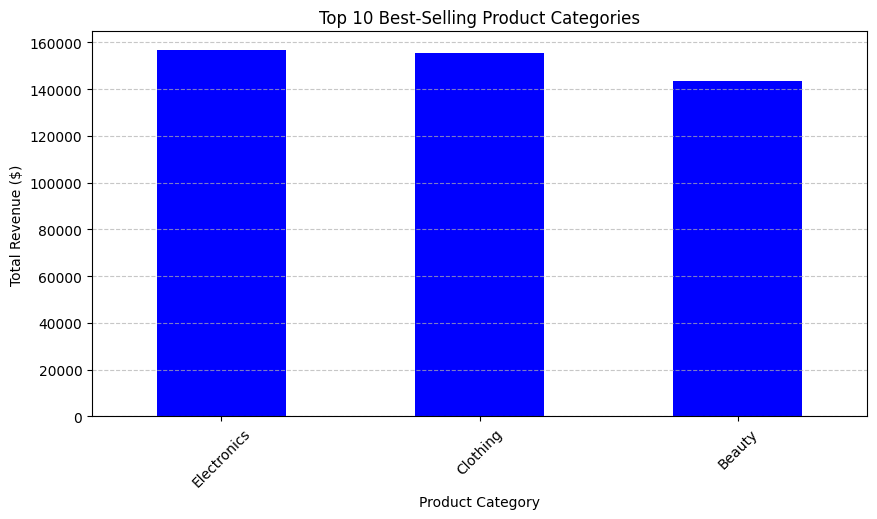

In [ ]:
#1. Top 10 Best-Selling Product Categories
top_products = df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_products.plot(kind="bar", color="blue")
plt.title("Top 10 Best-Selling Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

    Product Category  Profit
521           Beauty     0.0
179         Clothing     0.0
558         Clothing     0.0
302      Electronics     0.0
978           Beauty     0.0
Product Category
Beauty         0.0
Clothing       0.0
Electronics    0.0
Name: Profit, dtype: float64


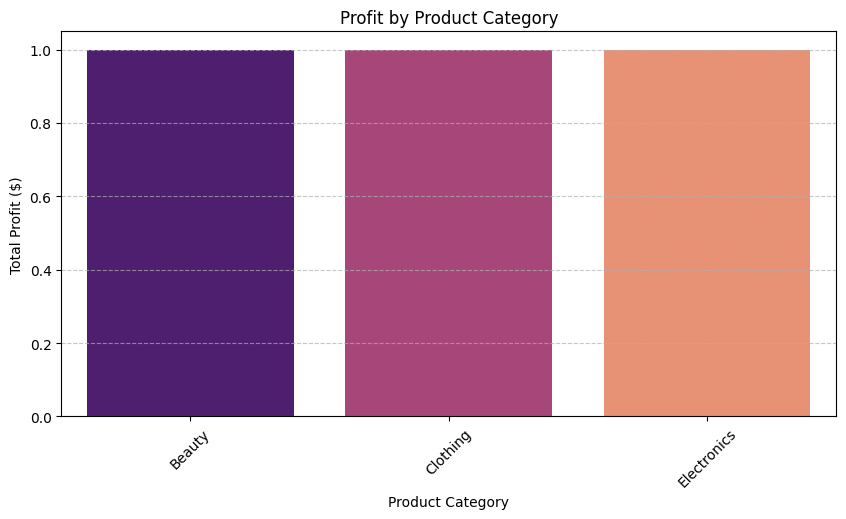

In [ ]:
#2. Profitability Analysis (Estimate Profit)**
# making sure no NaN values in relevant columns
df = df.dropna(subset=['Quantity', 'Price per Unit', 'Total Amount'])

# Calculate Profit
df['Profit'] = df['Total Amount'] - (df['Quantity'] * df['Price per Unit'])

# Check if Profit values are valid
print(df[['Product Category', 'Profit']].head())

# Group by 'Product Category' and sum up profits
profit_by_category = df.groupby("Product Category")["Profit"].sum().sort_values(ascending=False)

# Print aggregated profit for debugging
print(profit_by_category)

# If all values are zero or negative, add a small constant to visualize differences
if profit_by_category.max() <= 0:
    profit_by_category += abs(profit_by_category.min()) + 1

# Plot the profitability analysis
plt.figure(figsize=(10, 5))
sns.barplot(x=profit_by_category.index, y=profit_by_category.values, hue= profit_by_category.index , palette="magma")
plt.xticks(rotation=45)
plt.title("Profit by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Profit ($)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Observation and recommendation:**

1. Sales Trend Optimization: Throughout the year, sales naturally increase and decrease, with distinct seasonal peaks. Businesses should schedule promotions at quiet times and make sure they have enough inventory before peak demand occurs in order to optimize income.  

2. Best-Selling Items: A select group of items account for the majority of total sales. Growth and stock efficiency can be increased by giving priority to these high-performing products in marketing and inventory planning.  


3. Customer Retention Strategies: Long-term revenue is limited because many customers only make one purchase. Personalized incentives and loyalty programs can increase customer retention and promote repeat business.  

4. Inventory management: While some products stay stationary, others sell quickly. Overstocking slow-moving items can be avoided, and needless holding costs can be decreased, by basing stock levels on demand trends.  

5. Regional Performance Insights: Different regions have different sales performance, with some performing better than others. Sales potential can be increased by enhancing marketing in high-performing areas and modifying prices in underperforming ones.


**Conclusion:**


By analyzing data, spotting patterns, illustrating important insights, and providing practical suggestions for expansion, this EDA approach assists companies in making well-informed decisions.